In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Define Path
city_path = 'raw_data/city_data.csv'
ride_path = 'raw_data/ride_data.csv'

#Read CSV
city_df = pd.read_csv(city_path)
ride_df = pd.read_csv(ride_path)

In [3]:
#Pull data for fares
city_fare_data = {"city": ride_df["city"], "Average Fare": ride_df["fare"]}

#Put data in DataFrame
city_fare_df = pd.DataFrame(data=city_fare_data)

In [4]:
#Group DataFrame by city
city_fare_group = city_fare_df.groupby(["city"])

#Take averages for each city
city_fare_mean = city_fare_group.mean()

In [5]:
#Pull data for rides
city_ride_data = {"city": ride_df["city"], "Total Rides": ride_df["ride_id"]}

#Put data in DataFrame
city_ride_df = pd.DataFrame(data=city_ride_data)

In [6]:
#Group DataFrame by city
city_ride_group = city_ride_df.groupby(["city"])

#Count the rides for each city
city_ride_count = city_ride_group.count()

In [7]:
#Merge fare and ride DataFrames on city
ride_fare_merge = pd.merge(city_fare_mean, city_ride_count, left_index=True, right_index=True)

In [8]:
#Merge previous merge with the city data
city_merge = pd.merge(city_df, ride_fare_merge, left_on="city", right_index=True)

In [9]:
#Get urban data for bubble chart
urban_df = city_merge.groupby(['type']).get_group('Urban')

#Get suburban data for bubble chart
suburban_df = city_merge.groupby(['type']).get_group('Suburban')

#Get rural data for bubble chart
rural_df = city_merge.groupby(['type']).get_group('Rural')

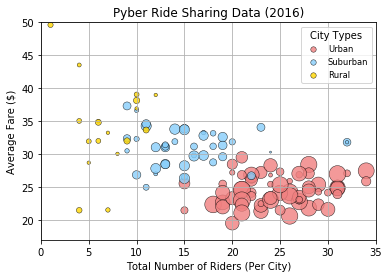

Note: Size of the points correlates to driver count


In [10]:
#Urban bubble plot
urban = plt.scatter(urban_df["Total Rides"], urban_df["Average Fare"], s=4*urban_df["driver_count"], c="lightcoral", alpha=.8, linewidths=.5, edgecolors="black", label="Urban")

#suburban bubble plot
suburban = plt.scatter(suburban_df["Total Rides"], suburban_df["Average Fare"], s=4*suburban_df["driver_count"], c="lightskyblue", alpha=.8, linewidths=.5, edgecolors="black", label="Suburban")

#rural bubble plot
rural = plt.scatter(rural_df["Total Rides"], rural_df["Average Fare"], s=4*rural_df["driver_count"], c="gold", alpha=.8, linewidths=.5, edgecolors="black", label="Rural")

#Set the upper and lower limits of the y axis
plt.ylim(17,50)

#Set the upper and lower limits of the x axis
plt.xlim(0,35)

#Create a title, x label, and y label for bubble chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Riders (Per City)")
plt.ylabel("Average Fare ($)")

#Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

#Place a grid
plt.grid()

# Save an image of the chart and print to screen
plt.savefig("Images/Pyber_bubble.png")
plt.show()
print("Note: Size of the points correlates to driver count")

In [11]:
#Group city data by city type
driver_type_group = city_df.groupby(["type"])

#Take the sum of all the drivers by city type
driver_type_sum = driver_type_group.sum()

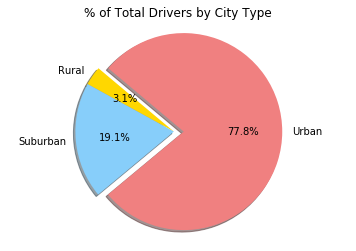

In [12]:
#Set labels for driver_type pie chart
labels = ["Rural", "Suburban", "Urban"]

#Set the colors of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

#set the urban slice to explode out
explode = (0, 0, 0.1)

#make driver_type pie chart
plt.pie(driver_type_sum["driver_count"], explode=explode, colors=colors, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)

#set driver_type title
plt.title("% of Total Drivers by City Type")

# Tell matplotlib to make a pie chart with equal axes
plt.axis("equal")

#Save image and print the pie chart to the screen
plt.savefig("Images/Pyber_driver_pie.png")
plt.show()

In [13]:
#get data for ride_type and fare_type pie charts
ride_type_data = {"type": city_merge["type"], "Average Fare": city_merge["Average Fare"], "Total Rides": city_merge["Total Rides"]}

#put into DataFrame
ride_type_df = pd.DataFrame(data=ride_type_data)

#Calculat total fares
ride_type_df["Total Fare"] = ride_type_df["Average Fare"] * ride_type_df["Total Rides"]

#group DataFrame by city type
ride_type_group = ride_type_df.groupby(["type"])

#sum all the columns of each type
ride_type_sum = ride_type_group.sum()

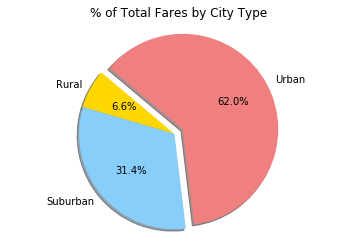

In [14]:
#Set labels for fare_type pie chart
labels = ["Rural", "Suburban", "Urban"]

#Set the colors of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

#set the urban slice to explode out
explode = (0, 0, 0.1)

#make fare_type pie chart
plt.pie(ride_type_sum["Total Fare"], explode=explode, colors=colors, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)

#set fare_type title
plt.title("% of Total Fares by City Type")

#Tell matplotlib to make a pie chart with equal axes
plt.axis("equal")

#save image and Print the pie chart to the screen
plt.savefig("Images/Pyber_fare_pie.png")
plt.show()

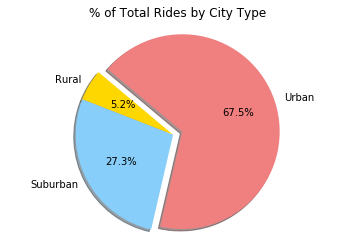

In [15]:
#Set labels for ride_type pie chart
labels = ["Rural", "Suburban", "Urban"]

#Set the colors of the pie chart
colors = ["gold", "lightskyblue", "lightcoral"]

#set the urban slice to explode out
explode = (0, 0, 0.1)

#make ride_type pie chart
plt.pie(ride_type_sum["Total Rides"], explode=explode, colors=colors, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140)

#set ride_type title
plt.title("% of Total Rides by City Type")

#tell matplotlib to make a pie chart with equal axes
plt.axis("equal")

#save an image and print the pie chart to the screen
plt.savefig("Images/Pyber_ride_pie.png")
plt.show()